# Introdução

Neste notebook, vamos explorar o dataset de **habitação da Califórnia**.

Este dataset é bastante útil para quem está a começar com **Machine Learning**, pois ele traz dados do censo de 1990 sobre as casas na Califórnia e é simples o suficiente para ser trabalhado, mas também contém desafios que ajudam a entender o processo de análise de dados.

## Objetivo
O objetivo deste notebook é realizar uma **Análise Exploratória de Dados (AED)**, que inclui:
- Ver como os dados estão organizados.
- Analisar as variáveis de forma individual.
- Verificar se existem dados em falta ou outliers.
- Criar alguns gráficos para entender as distribuições e relações entre as variáveis.

## Fonte do Conjunto de Dados

O conjunto de dados utilizado é o **California Housing Dataset**, que contém informações sobre as casas em várias regiões da Califórnia. Este dataset foi coletado durante o censo de 1990 e está disponível publicamente [aqui](https://www.kaggle.com/camnugent/california-housing-prices).

Conjunto de dados no Kaggle.

## Constituição do Grupo:
- David Martinho (25620);
- Marcelo Ferreira (25986);
- Nuno Oliveira (25987);


In [1]:
# Importar as bibliotecas necessárias

# Bibliotecas de álgebra linear e processamento de dados
import numpy as np
import pandas as pd

# Visualização Gráfica
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Utilitários
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carregar arquivos
from google.colab import files

# Fazer o upload do arquivo de dados de habitação da Califórnia
uploaded = files.upload()

# Renomear o arquivo para "california_housing_data.csv"
for fn in uploaded.keys():
    print('O utilizador carregou o ficheiro "{name}" com tamanho {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving housing.csv to housing.csv
O utilizador carregou o ficheiro "housing.csv" com tamanho 1423529 bytes


## Metadados do Conjunto de Dados

O conjunto de dados da Califórnia contém as seguintes variáveis:

- **longitude**: Coordenada geográfica (leste-oeste) da região.
- **latitude**: Coordenada geográfica (norte-sul) da região.
- **housing_median_age**: Idade mediana das casas na região (em anos).
- **total_rooms**: Número total de quartos em todas as casas da região.
- **total_bedrooms**: Número total de quartos de dormir em todas as casas da região.
- **population**: Número total de pessoas na região.
- **households**: Número total de famílias na região.
- **median_income**: Renda mediana das famílias na região.
- **median_house_value**: Valor mediano das casas na região.
- **ocean_proximity**: Proximidade com o oceano (C = perto da costa, O = oceano, etc.).


In [3]:
# Carregar o ficheiro de dados de habitação da Califórnia
cali_df = pd.read_csv('housing.csv')

# Mostrar o número de linhas do dataset
print("Número de linhas: ", len(cali_df))

Número de linhas:  20640


In [4]:
# Mostrar as primeiras linhas do dataset
cali_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Mostrar informações básicas sobre o DataFrame
print(cali_df.info())

# Mostrar estatísticas descritivas para as variáveis numéricas
print(cali_df.describe())

# Mostrar valores únicos para variáveis categóricas
for column in cali_df.columns:
    if cali_df[column].dtype == object:
        print(f"\nValores únicos para {column}:")
        print(cali_df[column].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

## Análise de Variáveis ​​Categóricas

A análise de variáveis categóricas tem como objetivo entender como as diferentes categorias dentro de uma variável se distribuem e como elas se relacionam com outras variáveis no conjunto de dados.

In [6]:
# Obter as variáveis categóricas do dataset
categorical_features = [feature for feature in cali_df.columns if cali_df[feature].dtype == object]
print(categorical_features)

['ocean_proximity']


In [7]:
# Função para gerar gráficos de barras
def bar_plot(variable):
    """
        Entrada: variável (ex: "ocean_proximity")
        Saída: gráfico de barras e contagem de valores
    """
    # Obter a variável
    var = cali_df[variable]
    # Contar o número de ocorrências para cada valor da variável
    varValue = var.value_counts()

    # Visualizar com gráfico de barras
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequência")
    plt.title(variable)
    plt.show()

    # Mostrar contagem de valores
    print(f"{variable}: \n{varValue}")

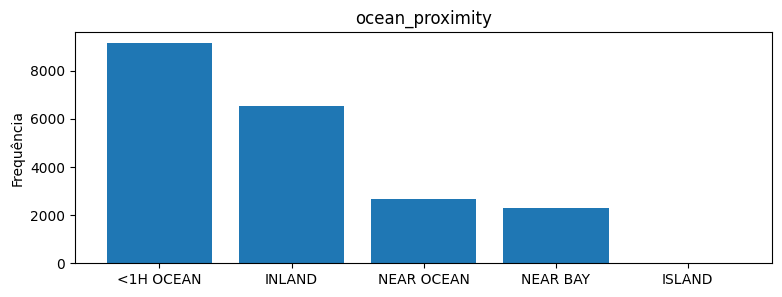

ocean_proximity: 
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [8]:
# Gerar as variáveis categóricas com menos de 10 valores distintos
for cf in categorical_features:
    if cali_df[cf].nunique() < 10:
        bar_plot(cf)

## Análise de Variáveis Numéricas

A análise de variáveis numéricas foca em entender a distribuição e a relação das variáveis contínuas, como `total_rooms`, `total_bedrooms`, `median_income`, e `median_house_value`, com o objetivo de identificar padrões, tendências e possíveis outliers.


In [9]:
# Visualizar a frequência e distribuição das variáveis numéricas
def plot_hist(variable):
    """
        Entrada: variável (ex: "median_income")
        Saída: histograma de distribuição
    """
    plt.figure(figsize = (9,3))
    plt.hist(cali_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequência")
    plt.title(f"{variable} distribuição com histograma")
    plt.show()

In [10]:
# Obter as variáveis numéricas do dataset
numerical_features = [feature for feature in cali_df.columns if cali_df[feature].dtype != object]
print(numerical_features)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


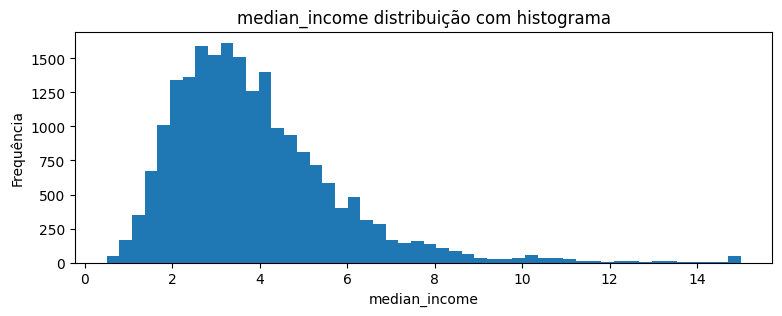

In [11]:
# Lista de variáveis a serem removidas (exceto 'median_income')
removed_nf = [feature for feature in numerical_features if feature != "median_income"]

# Visualizar o histograma de todas as variáveis numéricas, exceto 'median_income'
for nf in numerical_features:
    if nf not in removed_nf:
        plot_hist(nf)

## Encontra valores em falta

In [12]:
# Encontrar valores nulos na variável "total_bedrooms"
print(f'total_bedrooms tem {cali_df["total_bedrooms"].isnull().sum()} valores nulos')

# Mostrar as primeiras linhas onde "total_bedrooms" é nulo
cali_df[cali_df["total_bedrooms"].isnull()].head()

total_bedrooms tem 207 valores nulos


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


## Análise Bivariada

### ocean_proximity - house_value_range

A relação entre a **proximidade ao oceano** (`ocean_proximity`) e a **faixa de valor das casas** (`house_value_range`) mostra como a localização em relação ao oceano influencia o valor das casas. A tabela de contingência indica quantas ocorrências de diferentes valores de **`median_house_value`** existem para cada categoria de **`ocean_proximity`**.

### median_income - house_value_range

A relação entre a **renda mediana** (`median_income`) e a **faixa de valor das casas** (`house_value_range`) ajuda a entender como as diferentes faixas de renda se associam aos valores das casas. A tabela de contingência mostra como as faixas de **`median_income`** se distribuem entre as diferentes faixas de valor das casas.

### total_rooms - house_value_range

A análise entre o **número total de quartos** (`total_rooms`) e a **faixa de valor das casas** (`house_value_range`) revela como o tamanho das casas, medido pelo número de quartos, se relaciona com a faixa de valor das casas. A tabela de contingência fornece uma visão de quantos valores de **`total_rooms`** existem para cada faixa de preço.

### total_bedrooms - house_value_range

Por fim, a relação entre o **número total de quartos de dormir** (`total_bedrooms`) e a **faixa de valor das casas** (`house_value_range`) mostra-nos como o número de quartos de dormir influencia a faixa de valor das casas. A tabela de contingência mostra como os valores de **`total_bedrooms`** estão distribuídos entre as diferentes faixas de preço das casas.


In [13]:
# Agrupar median_house_value em intervalos
bins = [0, 15000, 30000, 50000, 100000, 200000, 500000]
labels = ['0-15000', '15000-30000', '30000-50000', '50000-100000', '100000-200000', '200000-500000']
cali_df['house_value_range'] = pd.cut(cali_df['median_house_value'], bins=bins, labels=labels)

# ocean_proximity vs house_value_range
print("ocean_proximity vs house_value_range")
display(pd.crosstab(cali_df['ocean_proximity'], cali_df['house_value_range']))

# median_income vs house_value_range
print("\nmedian_income vs house_value_range")
display(pd.crosstab(cali_df['median_income'], cali_df['house_value_range']))

# total_rooms vs house_value_range
print("\ntotal_rooms vs house_value_range")
display(pd.crosstab(cali_df['total_rooms'], cali_df['house_value_range']))

# total_bedrooms vs house_value_range
print("\ntotal_bedrooms vs house_value_range")
display(pd.crosstab(cali_df['total_bedrooms'], cali_df['house_value_range']))

ocean_proximity vs house_value_range


house_value_range,0-15000,15000-30000,30000-50000,50000-100000,100000-200000,200000-500000
ocean_proximity,,,,,,
<1H OCEAN,0,1,8,334,3737,4524
INLAND,4,8,180,2736,2909,687
ISLAND,0,0,0,0,0,5
NEAR BAY,0,1,3,158,745,1189
NEAR OCEAN,0,2,3,220,882,1339



median_income vs house_value_range


house_value_range,0-15000,15000-30000,30000-50000,50000-100000,100000-200000,200000-500000
median_income,,,,,,
0.4999,0,0,0,7,3,0
0.5360,1,0,1,2,3,3
0.5495,0,0,0,1,0,0
0.6433,0,0,0,0,1,0
0.6775,0,0,0,0,0,1
...,...,...,...,...,...,...
12.5381,0,0,0,0,1,0
12.5915,0,0,0,0,0,1
13.1107,0,0,0,0,0,1



total_rooms vs house_value_range


house_value_range,0-15000,15000-30000,30000-50000,50000-100000,100000-200000,200000-500000
total_rooms,,,,,,
2.0,0,0,0,0,1,0
6.0,0,0,0,1,0,0
11.0,0,0,0,0,1,0
12.0,0,0,0,1,0,0
15.0,0,0,0,0,1,1
...,...,...,...,...,...,...
30450.0,0,0,0,0,1,0
32054.0,0,0,0,0,0,1
32627.0,0,0,0,0,1,0



total_bedrooms vs house_value_range


house_value_range,0-15000,15000-30000,30000-50000,50000-100000,100000-200000,200000-500000
total_bedrooms,,,,,,
2.0,0,0,0,1,1,0
3.0,0,0,0,0,0,5
4.0,0,0,0,4,1,1
5.0,0,0,0,0,4,2
6.0,0,0,0,2,1,2
...,...,...,...,...,...,...
5033.0,0,0,0,0,1,0
5290.0,0,0,0,0,0,1
5471.0,0,0,0,0,0,1


## Visualização

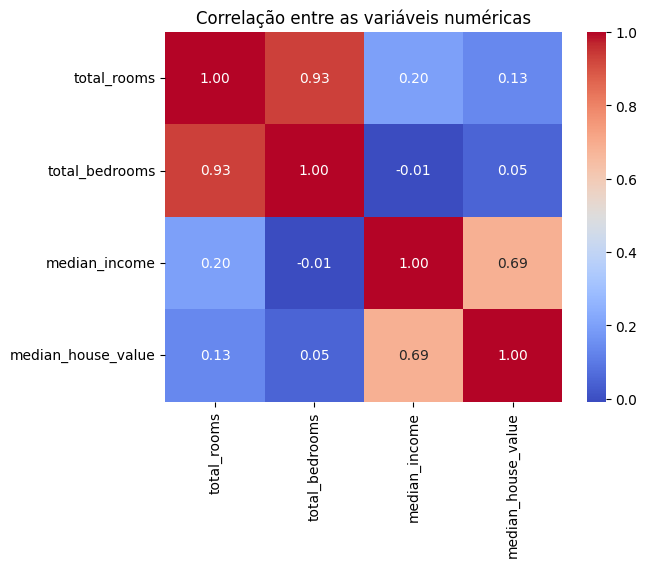

In [14]:
# Lista de variáveis para a correlação
list1 = ["total_rooms", "total_bedrooms", "median_income", "median_house_value"]

# Gerar o heatmap de correlação
sns.heatmap(cali_df[list1].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlação entre as variáveis numéricas")
plt.show()

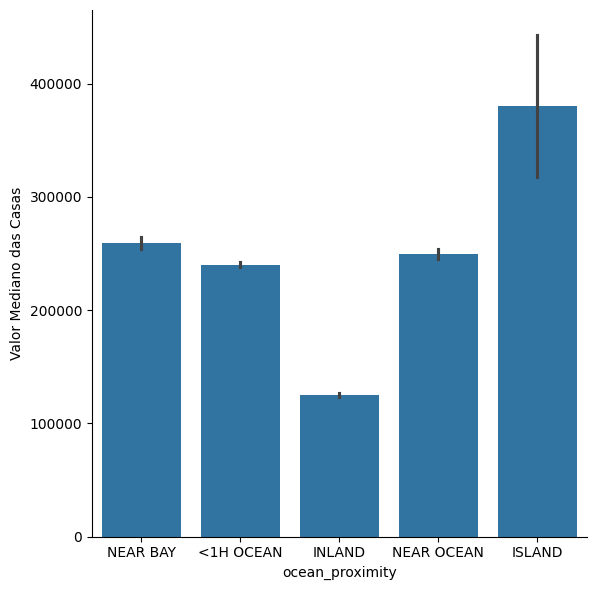

In [15]:
# Criar gráfico de barras para comparar 'ocean_proximity' com 'median_house_value'
g = sns.catplot(x="ocean_proximity", y="median_house_value", data=cali_df, kind="bar", height=6)
g.set_ylabels("Valor Mediano das Casas")
plt.show()

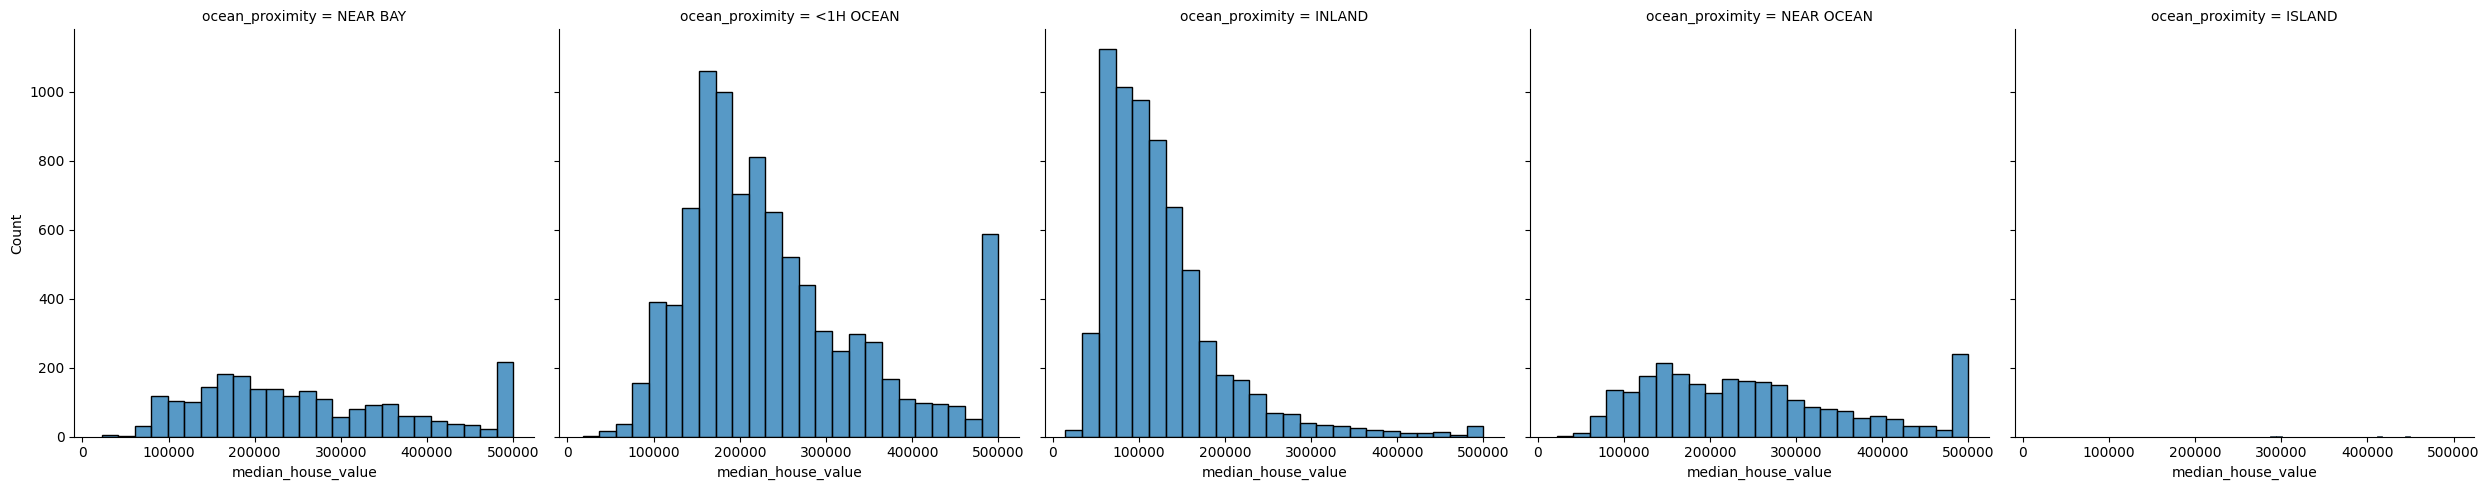

In [16]:
# Criar um FacetGrid para comparar a distribuição de 'median_house_value' em relação a 'ocean_proximity'
g = sns.FacetGrid(cali_df, col="ocean_proximity", height=5)
g.map(sns.histplot, "median_house_value", bins=25)
plt.show()

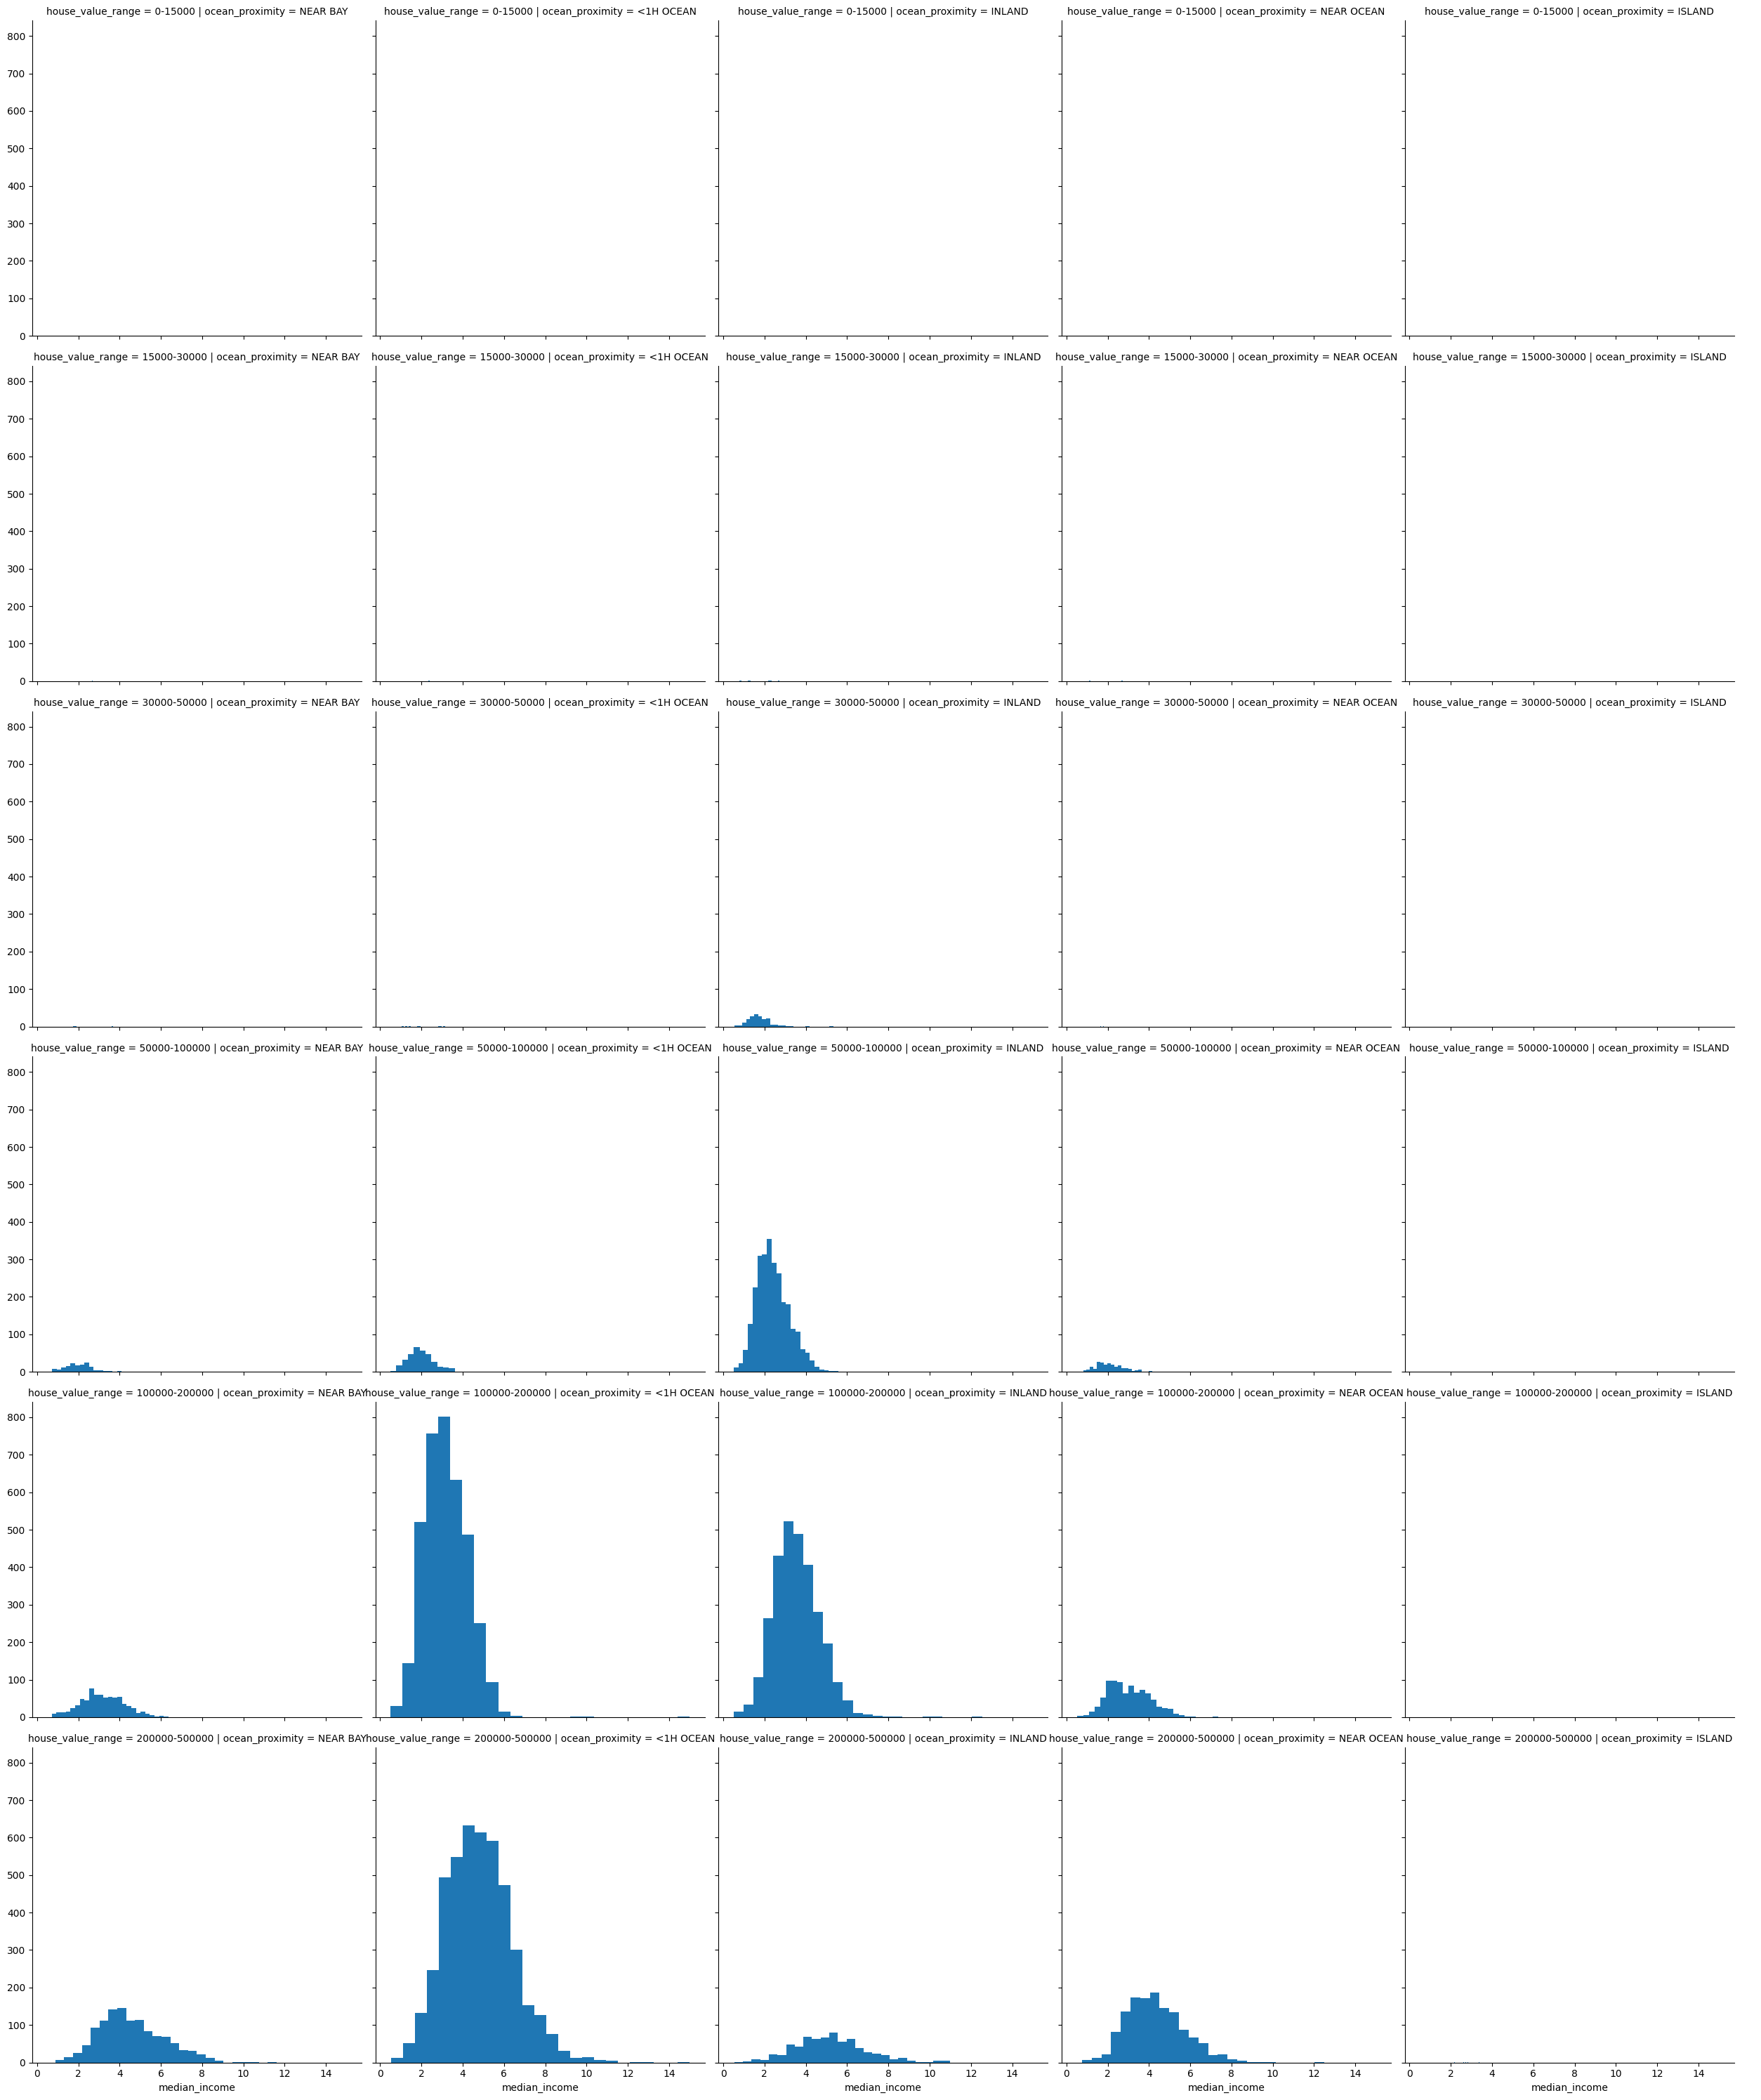

In [17]:
# Criar o FacetGrid para comparar a distribuição de 'median_income' em relação a 'ocean_proximity' e 'house_value_range'
g = sns.FacetGrid(cali_df, col="ocean_proximity", row="house_value_range", height=5)
g.map(plt.hist, "median_income", bins=25)
g.add_legend()
plt.show()

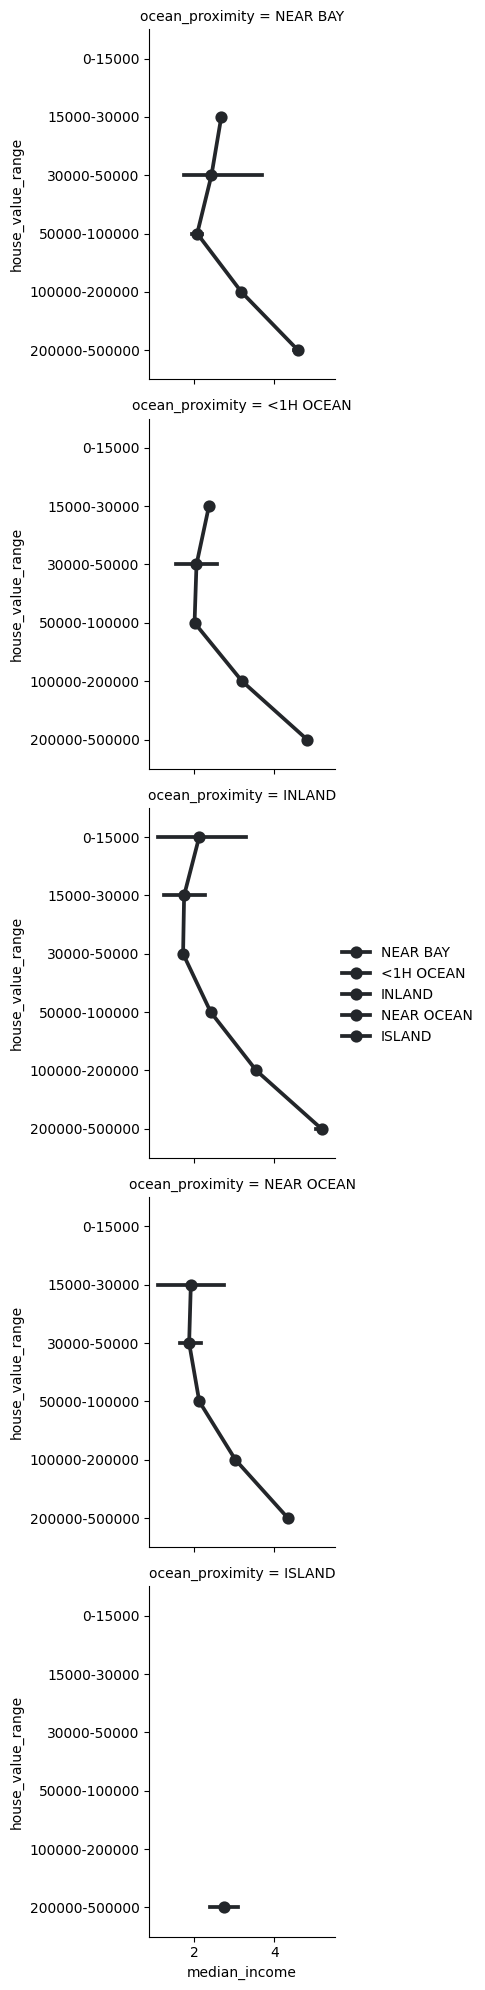

In [18]:
# Criar o FacetGrid para comparar 'median_income' com 'median_house_value' por 'ocean_proximity'
g = sns.FacetGrid(cali_df, row="ocean_proximity", height=4)
g.map(sns.pointplot, "median_income", "house_value_range", "ocean_proximity")

# Adicionar legenda
g.add_legend()

# Mostrar o gráfico
plt.show()

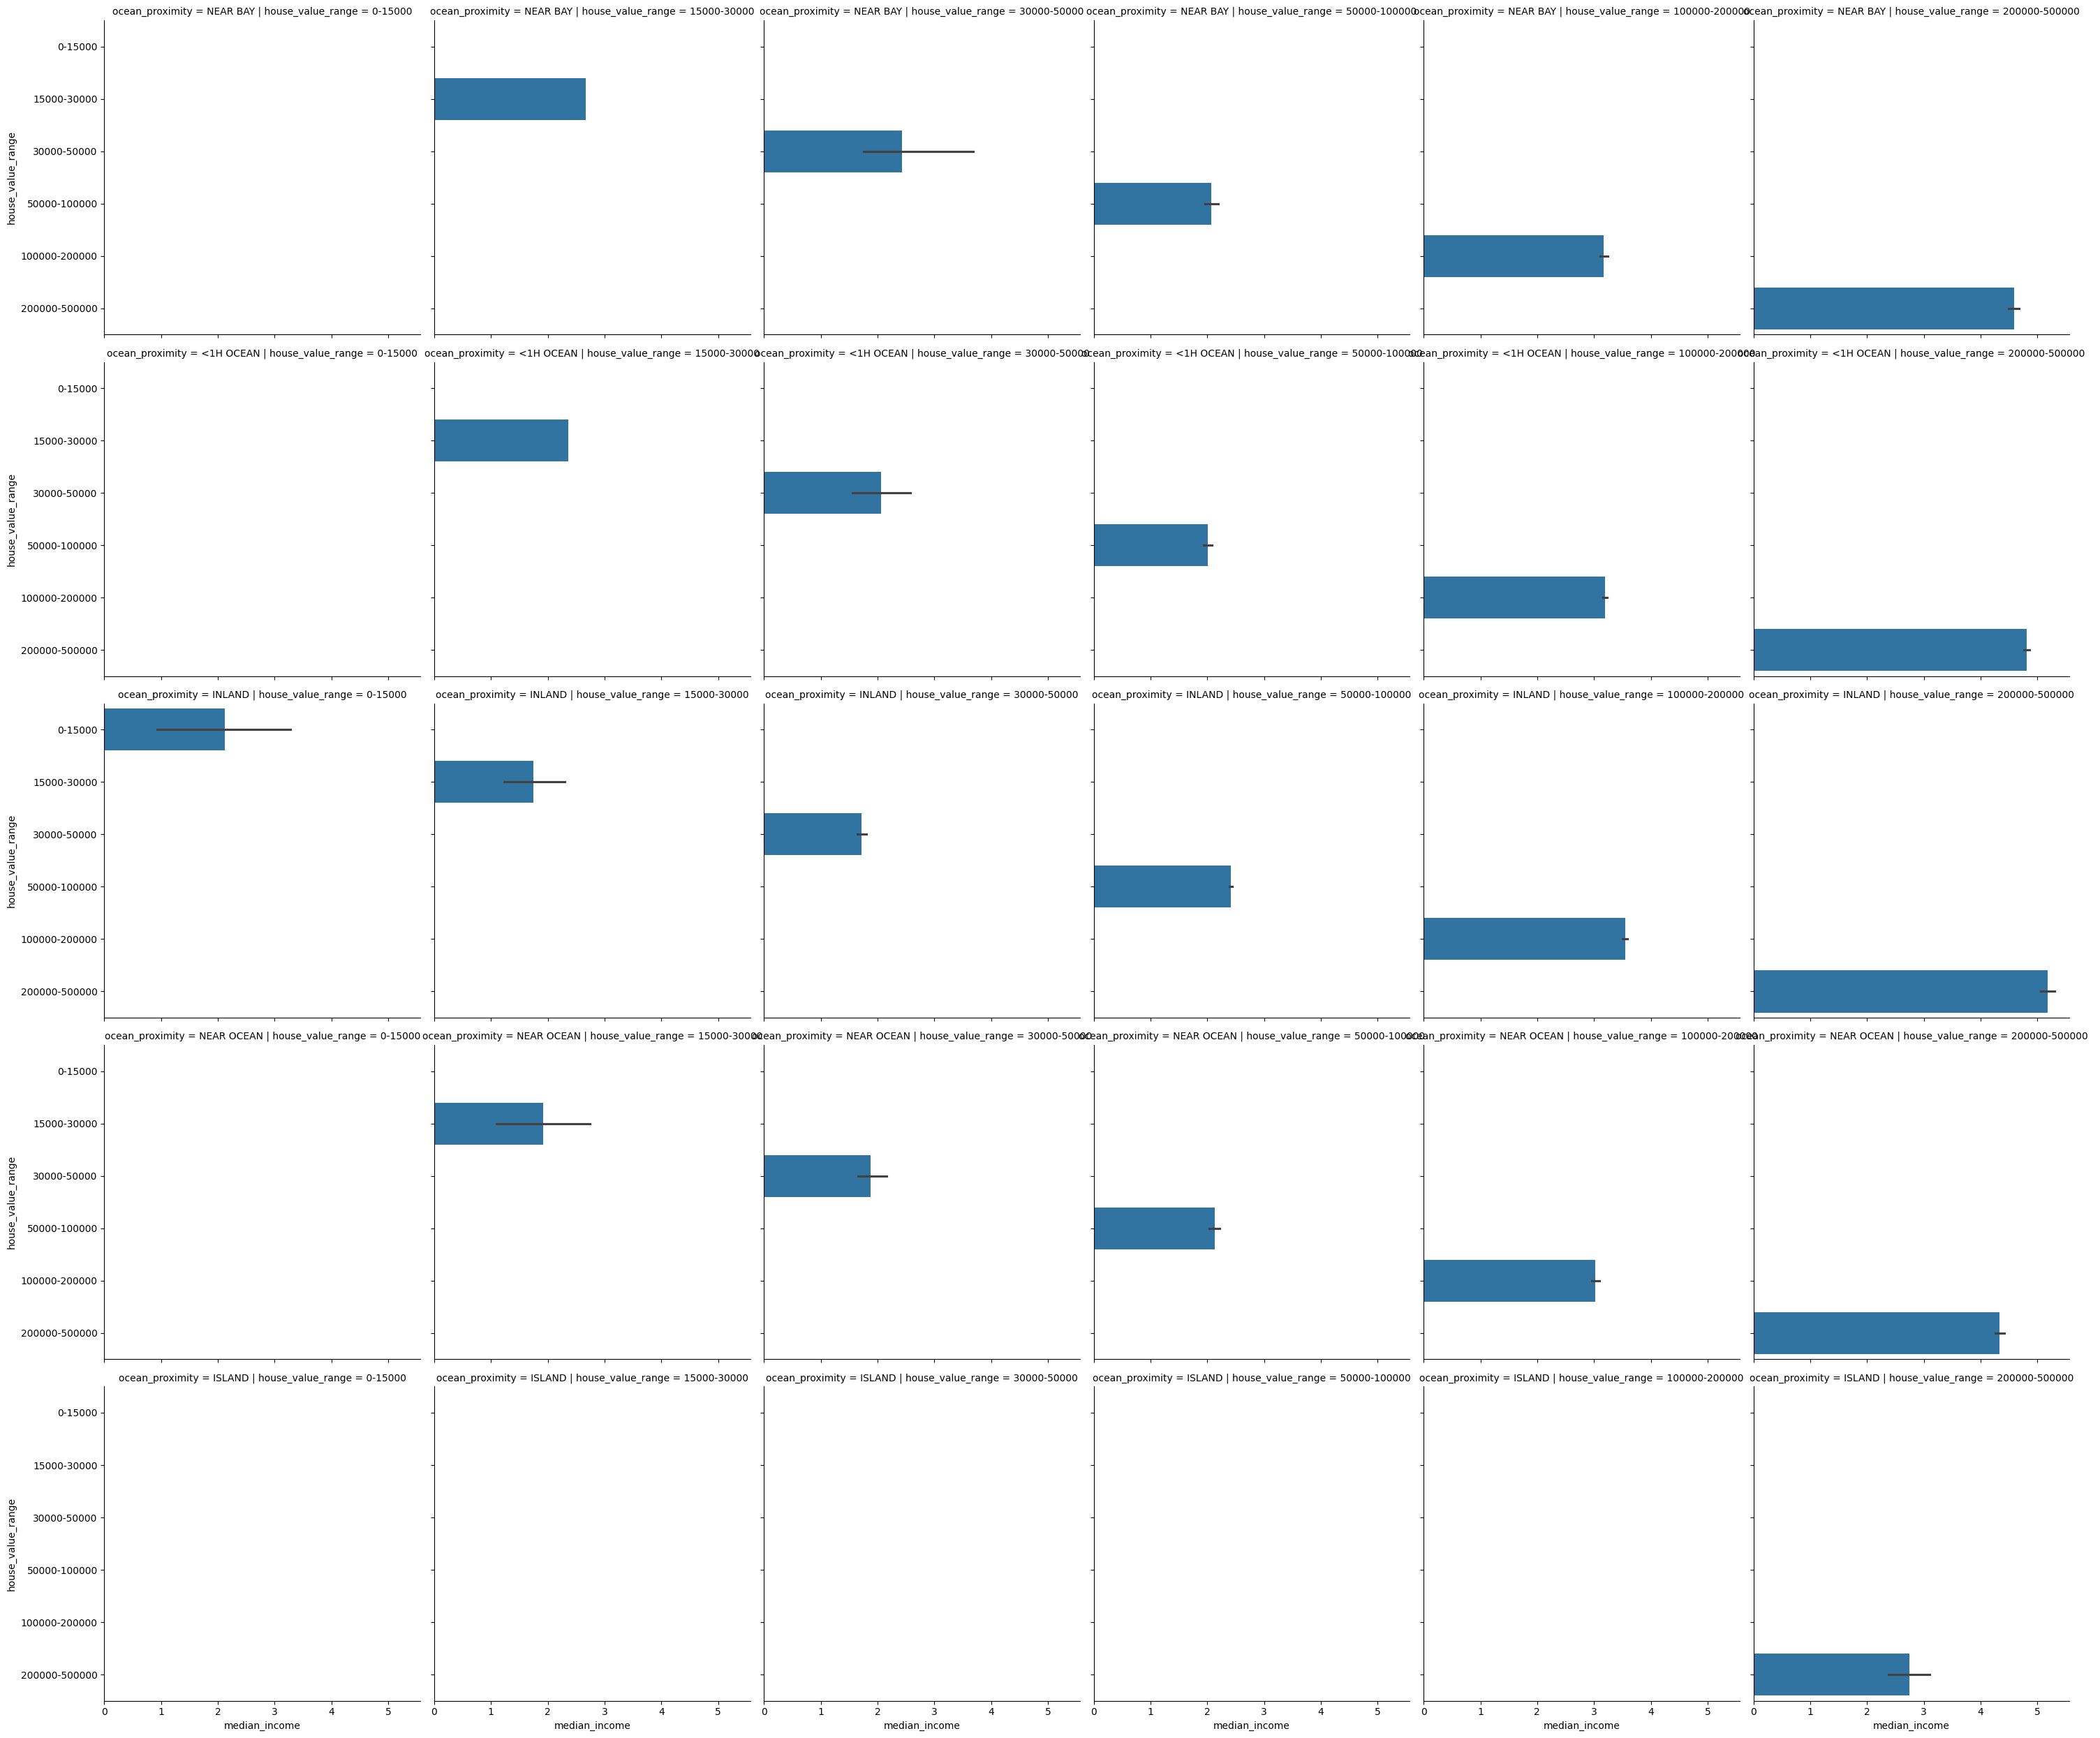

In [19]:
# Criar o FacetGrid para comparar a median_income em relação à ocean_proximity e house_value_range
g = sns.FacetGrid(cali_df, row="ocean_proximity", col="house_value_range", height=5)
g.map(sns.barplot, "median_income", "house_value_range")

# Adicionar legenda
g.add_legend()

# Mostra o gráfico
plt.show()

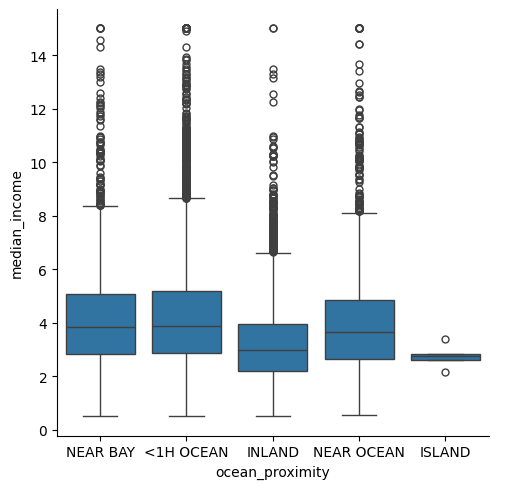

In [20]:
# median_income vs ocean_proximity
sns.catplot(x="ocean_proximity", y="median_income", data=cali_df, kind="box")
plt.show()

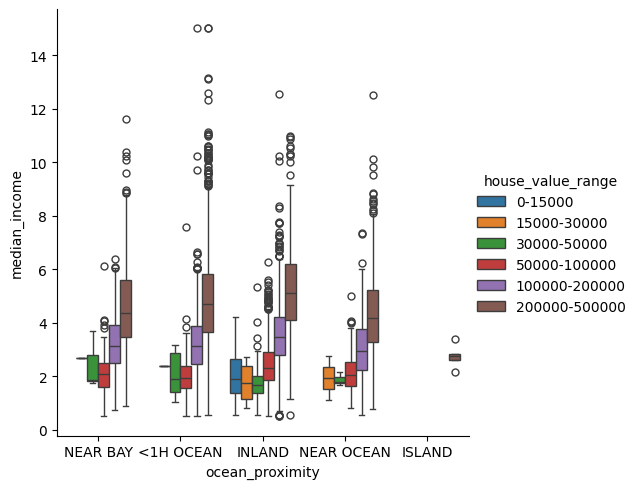

In [21]:
# median_income vs house_value_range vs ocean_proximity
sns.catplot(x="ocean_proximity", y="median_income", hue="house_value_range", data=cali_df, kind="box")
plt.show()

# Preparação Dados

### Encontra e preenche valores em falta

In [22]:
# Verificar colunas com valores nulos (NaN)
cali_df.columns[cali_df.isnull().any()]

Index(['total_bedrooms', 'house_value_range'], dtype='object')

In [23]:
# Lista numero de valores nulos por variável
cali_df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [24]:
# Verificar as linhas onde 'total_bedrooms' tem valores nulos
cali_df[cali_df["total_bedrooms"].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_value_range
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,100000-200000
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,50000-100000
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,100000-200000
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,200000-500000
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,100000-200000
...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,200000-500000
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,100000-200000
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,200000-500000
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN,200000-500000


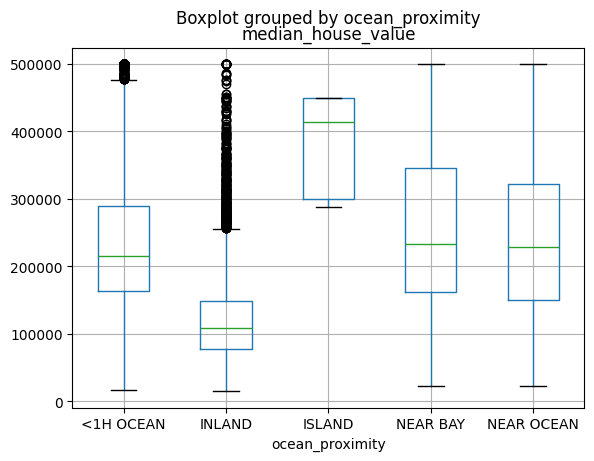

In [25]:
# Gerar o boxplot para 'median_house_value' por 'ocean_proximity'
cali_df.boxplot(column="median_house_value", by="ocean_proximity")
plt.show()

In [26]:
# Preencher os valores nulos de 'total_bedrooms' com a mediana da coluna
cali_df["total_bedrooms"] = cali_df["total_bedrooms"].fillna(cali_df["total_bedrooms"].median())

# Verificar se ainda existem valores nulos em 'total_bedrooms'
cali_df[cali_df["total_bedrooms"].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_value_range


In [27]:
# Verificar os valores nulos em 'house_value_range'
cali_df[cali_df["house_value_range"].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_value_range
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY,NaN
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY,NaN
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY,NaN
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY,NaN
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY,NaN
...,...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN,NaN
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN,NaN
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN,NaN
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN,NaN


In [28]:
# Preencher os valores nulos de 'house_value_range' com a moda (valor mais frequente)
cali_df["house_value_range"] = cali_df["house_value_range"].fillna(cali_df["house_value_range"].mode()[0])

# Verificar se ainda existem valores nulos em 'house_value_range'
cali_df[cali_df["house_value_range"].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_value_range


In [29]:
# Mostrar a linha para 'total_rooms' igual a 2000
print(cali_df[cali_df['total_rooms'] == 2000])

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3705     -118.39     34.19                41.0       2000.0           485.0   
4174     -118.21     34.10                36.0       2000.0           533.0   
8147     -118.10     33.83                36.0       2000.0           343.0   
8975     -118.41     34.01                43.0       2000.0           529.0   
10408    -117.58     33.65                 4.0       2000.0           422.0   
11580    -118.03     33.77                27.0       2000.0           310.0   
11983    -117.48     34.01                23.0       2000.0           376.0   
13310    -117.61     34.09                11.0       2000.0           391.0   
14704    -117.07     32.81                15.0       2000.0           402.0   

       population  households  median_income  median_house_value  \
3705       1439.0       461.0         3.0491            192000.0   
4174       1234.0       535.0         3.7437            241700.0   
8147 

# Feature Engineering

Vamos seguir os seguintes passos:

1. **Extrair categorias de "ocean_proximity"**:
   - Vamos **manipular** a variável categórica `ocean_proximity` para criar novas variáveis binárias (one-hot encoding) representando a proximidade ao oceano.

2. **Adicionar a variável transformada** aos dados:
   - Após a transformação da variável `ocean_proximity`, vamos adicionar as novas variáveis como **features** para o modelo.

3. **Remover a variável original**:
   - Vamos **remover** a coluna original de `ocean_proximity` após a transformação, pois já teremos as novas variáveis binárias.

4. **One-hot encoding**:
   - A variável **`ocean_proximity`** não é numérica, portanto, será necessário aplicar **one-hot encoding** para convertê-la em variáveis binárias.



In [30]:
# Mostrar os primeiros 10 valores de 'ocean_proximity'
print(cali_df["ocean_proximity"].head(10))

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
5    NEAR BAY
6    NEAR BAY
7    NEAR BAY
8    NEAR BAY
9    NEAR BAY
Name: ocean_proximity, dtype: object


In [31]:
# Criar a nova coluna 'Proximity_Level' com base em 'ocean_proximity', utilizando letras
cali_df["Proximity_Level"] = cali_df["ocean_proximity"].apply(
    lambda x: "1O" if "<1H OCEAN" in x else  # '1O' para "<1H OCEAN"
              "NO" if "NEAR OCEAN" in x else  # 'NO' para "NEAR OCEAN"
              "IN" if "INLAND" in x else  # 'IN' para "INLAND"
              "B" if "BAY" in x else  # 'B' para "NEAR BAY"
              "IS"  # 'IS' para "ISLAND"
)

# Mostrar os primeiros 10 valores da nova coluna 'Proximity_Level'
print(cali_df["Proximity_Level"].head(10))

0    B
1    B
2    B
3    B
4    B
5    B
6    B
7    B
8    B
9    B
Name: Proximity_Level, dtype: object


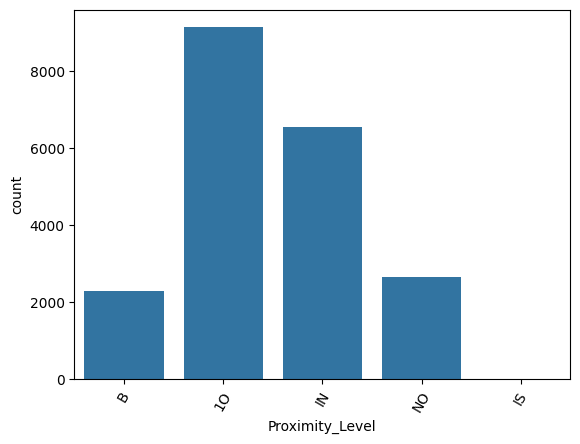

In [32]:
# Criar um countplot para a variável 'Proximity_Level'
sns.countplot(x="Proximity_Level", data=cali_df)

# Rotacionar os rótulos no eixo X para melhor visualização
plt.xticks(rotation = 60)

# Mostrar o gráfico
plt.show()

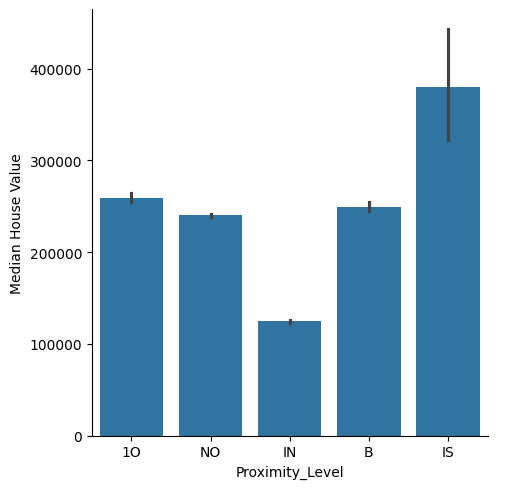

In [34]:
# Mostrar a probabilidade de house_value_range (faixa de valor das casas) por Proximity_Level
g = sns.catplot(x = "Proximity_Level", y = "median_house_value", data = cali_df, kind = "bar")

# Definir os rótulos do eixo X (as categorias de proximidade)
g.set_xticklabels(["1O", "NO", "IN", "B", "IS"])

# Definir o rótulo do eixo Y para refletir o valor médio de casa
g.set_ylabels("Median House Value")

# Mostrar o gráfico
plt.show()

In [35]:
# Remover a coluna 'ocean_proximity' após criar a 'Proximity_Level'
cali_df.drop(labels = ["ocean_proximity"], axis = 1, inplace = True)

# Mostrar as primeiras 5 linhas para verificar
cali_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,house_value_range,Proximity_Level
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,200000-500000,B
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,200000-500000,B
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,200000-500000,B
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,200000-500000,B
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,200000-500000,B


In [36]:
# One-hot encoding para 'Proximity_Level'
cali_df = pd.get_dummies(cali_df, columns=["Proximity_Level"])

# Mostrar as primeiras 5 linhas para verificar
cali_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,house_value_range,Proximity_Level_1O,Proximity_Level_B,Proximity_Level_IN,Proximity_Level_IS,Proximity_Level_NO
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,200000-500000,False,True,False,False,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,200000-500000,False,True,False,False,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,200000-500000,False,True,False,False,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,200000-500000,False,True,False,False,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,200000-500000,False,True,False,False,False


## Deteção de Outliers

In [37]:
# Função para detetar outliers
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # 1º quartil
        Q1 = np.percentile(df[c], 25)
        # 3º quartil
        Q3 = np.percentile(df[c], 75)
        # IQR
        IQR = Q3 - Q1
        # Passo para detetar outliers
        outlier_step = IQR * 1.5
        # Detetar outliers e os seus índices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Guardar índices
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

# Aplicar a função ao dataset da Califórnia
outliers = detect_outliers(cali_df, ['total_rooms', 'total_bedrooms', 'median_income', 'median_house_value'])
print("Outliers encontrados nos índices:", outliers)

Outliers encontrados nos índices: [922, 1574, 1582, 1585, 1590, 1593, 1636, 1645, 3486, 3542, 4014, 4038, 4047, 4048, 4049, 4050, 4070, 4106, 4111, 4347, 4354, 5241, 5244, 5246, 5250, 5252, 5253, 5259, 5264, 5265, 5270, 5282, 5347, 5492, 5724, 5730, 6576, 8311, 8786, 8796, 8799, 8800, 8802, 8804, 8806, 8807, 8817, 8858, 8887, 8985, 9004, 9013, 9015, 9019, 9027, 9033, 9385, 9417, 10312, 10319, 10376, 10417, 10519, 10644, 10759, 11008, 11009, 11901, 12430, 14481, 14483, 15689, 16170, 16911, 16914, 16935, 17024, 17173, 18041, 18361, 18377, 20273, 20335, 20427]


In [38]:
# Encontrar os outliers para as variáveis 'total_rooms', 'total_bedrooms', 'median_income', 'median_house_value'
outliers = detect_outliers(cali_df, ['total_rooms', 'total_bedrooms', 'median_income', 'median_house_value'])

# Mostrar as linhas correspondentes aos outliers
outlier_data = cali_df.loc[outliers]
print(outlier_data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
922      -121.92     37.53                 7.0      28258.0          3864.0   
1574     -122.03     37.83                24.0       5948.0           738.0   
1582     -122.00     37.86                18.0       8953.0          1074.0   
1585     -122.00     37.84                16.0       7681.0           946.0   
1590     -122.10     37.93                20.0      10212.0          1424.0   
...          ...       ...                 ...          ...             ...   
18361    -122.14     37.36                23.0      11294.0          1377.0   
18377    -121.84     37.18                 6.0       9176.0          1201.0   
20273    -119.23     34.17                18.0       6171.0          1490.0   
20335    -118.94     34.24                 5.0      10018.0          1233.0   
20427    -118.80     34.19                 4.0      15572.0          2222.0   

       population  households  median_income  media

In [39]:
# Remove os outliers
cali_df = cali_df.drop(detect_outliers(cali_df,["total_rooms","total_bedrooms","median_income","median_house_value"]),axis = 0).reset_index(drop = True)

In [40]:
# Guardar o DataFrame num arquivo CSV
cali_df.to_csv('housing_aed.csv', index=False)